In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [3]:
train_generator = train_datagen.flow_from_directory(
    r"D:\archive (3)",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    r"D:\archive (3)",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset='validation'
)
    
    

Found 598 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [4]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid'),#out layer
])
    
    
    

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5342 - loss: 1.2166 - val_accuracy: 0.6351 - val_loss: 0.6585
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6475 - loss: 0.6497 - val_accuracy: 0.7297 - val_loss: 0.5748
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7795 - loss: 0.4905 - val_accuracy: 0.7838 - val_loss: 0.5229
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8368 - loss: 0.3740 - val_accuracy: 0.7838 - val_loss: 0.5596
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8819 - loss: 0.2923 - val_accuracy: 0.7027 - val_loss: 0.7145


In [7]:
model.save("COVID-19 Lung.h5")

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

#Load the saved model
model= load_model(r"C:\Users\HP\COVID-19 Lung.h5")
print("model loaded")


model loaded


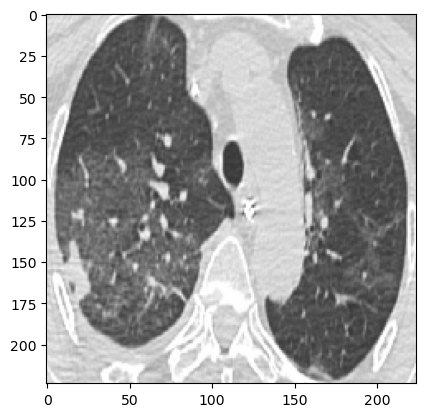

In [37]:
#from PIL import Image
#A = Image.open(r"D:\archive (3)\CT_COVID\2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png")
#A.show()
from matplotlib import pyplot as plt

test_image_path=(r"D:\archive (3)\CT_COVID\2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png")
img=image.load_img(test_image_path,target_size=(224, 224))

plt.imshow(img)
plt.show()
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)

In [13]:
img_array/=255.
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[[0.9201778]]


In [14]:
if prediction<0.5:
    print("prediction:Non-Covid(probability:",prediction[0][0])
else:
    print("prediction:Covid present(probability:",prediction[0][0])

prediction:Covid present(probability: 0.9201778


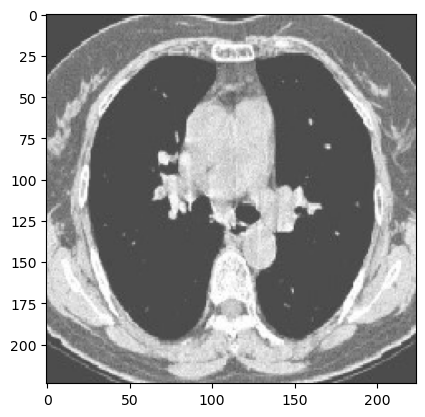

In [34]:
from matplotlib import pyplot as plt

test_image_path=(r"D:\archive (3)\CT_NonCOVID\1%1.jpg")
img=image.load_img(test_image_path,target_size=(224, 224))
plt.imshow(img)
plt.show()


img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)

In [35]:
img_array/=255. 
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[0.6655474]]


In [36]:
if prediction<0.5:
    print("prediction:Non-Covid(probability:",prediction[0][0])
else:
    print("prediction:Covid present(probability:",prediction[0][0])

prediction:Covid present(probability: 0.6655474
